In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Reading the Dataset

In [2]:
df = pd.read_csv("./PYTORCH_NOTEBOOKS/PYTORCH_NOTEBOOKS/Data/NYCTaxiFares.csv");df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [3]:
df["fare_amount"].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

# Feature Engineering

## Calculating Traveled Distance

$$
a = \sin^2\left(\frac{\Delta\varphi}{2}\right) + \cos(\varphi_1) \cdot \cos(\varphi_2) \cdot \sin^2\left(\frac{\Delta\lambda}{2}\right)
$$

$$
c = 2 \cdot \operatorname{atan2}\left(\sqrt{a}, \sqrt{1-a}\right)
$$

$$
d = R \cdot c
$$


In [4]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between GPS coordinates
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [5]:
df["dist_km"] = haversine_distance(df, "pickup_latitude", "pickup_longitude", "dropoff_latitude", "dropoff_longitude")
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


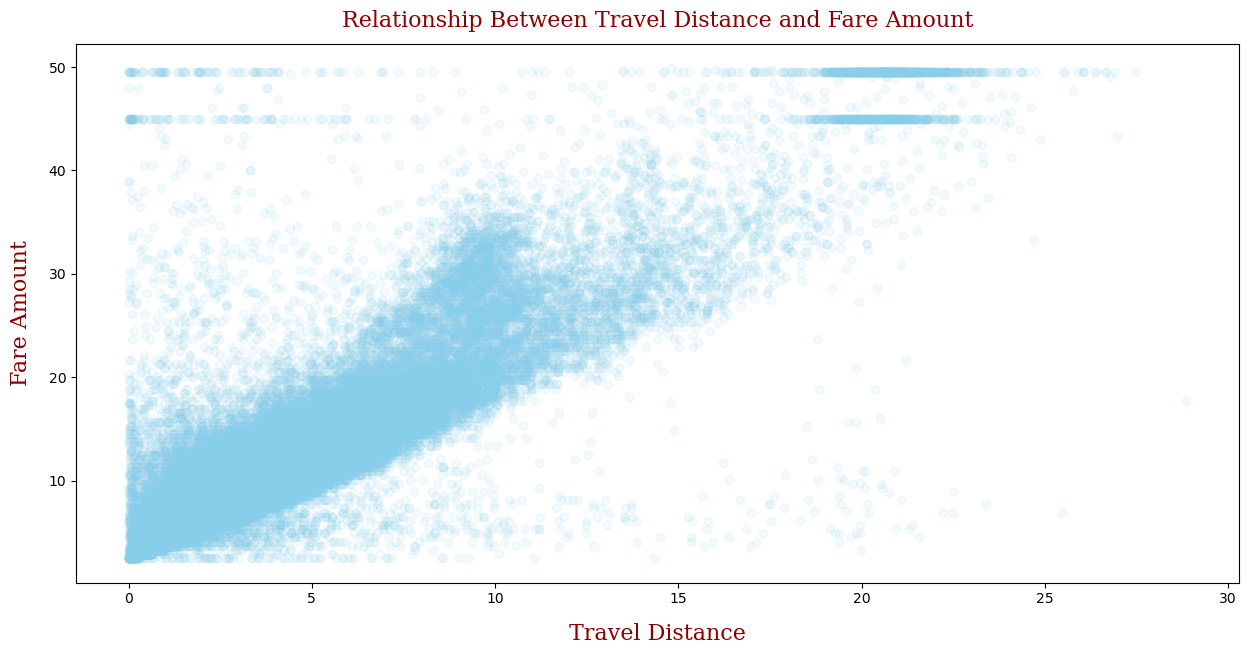

In [6]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.figure(figsize = (15, 7))
plt.scatter(df["dist_km"], df["fare_amount"], alpha = 0.1, c = "skyblue")
plt.xlabel("Travel Distance", labelpad=12, fontdict=font)
plt.ylabel("Fare Amount", labelpad=12, fontdict=font)
plt.title("Relationship Between Travel Distance and Fare Amount", pad = 12,  fontdict=font)
plt.show()

## Extracting Features

In [7]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


>  NewYork Time Zone In April -- Time Zone: EST (Eastern Standard Time) UTC/GMT -4 hours

In [8]:
df["pickup_datetime"] = df["pickup_datetime"] - pd.Timedelta(hours=4)
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 04:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 11:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 07:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 17:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-16 22:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [9]:
df["hour"] = df["pickup_datetime"].dt.hour
df["am-pm"] = list(map(lambda x: "PM" if x >= 12 else "AM", df["hour"]))
df["weekday"] = df["pickup_datetime"].dt.strftime("%A")
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,hour,am-pm,weekday
0,2010-04-19 04:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,4,AM,Monday
1,2010-04-17 11:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,11,AM,Saturday
2,2010-04-17 07:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,7,AM,Saturday
3,2010-04-11 17:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,17,PM,Sunday
4,2010-04-16 22:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,22,PM,Friday


In [10]:
categorical_features = df.iloc[:, -3:].columns.tolist()
continues_features = df.drop(categorical_features + ["pickup_datetime", "fare_amount"], axis = 1).columns.tolist()

In [11]:
for item in categorical_features:
    df[item] = df[item].astype("category")

In [12]:
cat_features_arr = np.stack([df[item].cat.codes.values for item in categorical_features], axis = 1)
cat_features_arr

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [13]:
cont_features_arr = np.stack([df[item].values for item in continues_features], axis = 1)
cont_features_arr[:5]

array([[  0.        , -73.992365  ,  40.730521  , -73.975499  ,
         40.744746  ,   1.        ,   2.12631159],
       [  0.        , -73.990078  ,  40.740558  , -73.974232  ,
         40.744114  ,   1.        ,   1.39230687],
       [  1.        , -73.994149  ,  40.751118  , -73.960064  ,
         40.766235  ,   2.        ,   3.32676344],
       [  0.        , -73.990485  ,  40.756422  , -73.971205  ,
         40.748192  ,   1.        ,   1.86412925],
       [  1.        , -73.990976  ,  40.734202  , -73.905956  ,
         40.743115  ,   1.        ,   7.23132104]])

# Converting to Tensor

In [14]:
cats = torch.tensor(cat_features_arr, dtype = torch.int64)
conts = torch.tensor(cont_features_arr, dtype= torch.float)
target = torch.tensor(df["fare_amount"].values, dtype=torch.float).reshape(-1, 1) 

In [15]:
cat_sizes = [len(df[item].unique()) for item in categorical_features]
embedding_sizes = [(size, min(50, (size + 1) //2)) for size in cat_sizes]


# Model Building

In [16]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, layers, out_sz, p=0.5):
        
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)

        layerlist = []
        n_emb = sum([nf for ni, nf in emb_szs])
        n_in = n_emb + n_cont

        for i in layers:
            layerlist.append(nn.Linear(n_in, i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        
        layerlist.append(nn.Linear(layers[-1], out_sz))
        self.layers = nn.Sequential(*layerlist)

    def forward(self, x_cat, x_cont):

        embeddings = []


        for i, e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:, i]))

        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)

        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x


In [ ]:
torch.manual_seed(123)

model = TabularModel(embedding_sizes, conts.shape[1], [200, 100], 1, 0.40)

In [18]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(7, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=24, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [19]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [20]:
batch_size = 120000
test_size = int(batch_size * 0.20)

In [21]:
cat_train = cats[:batch_size - test_size]
cat_test = cats[batch_size - test_size:batch_size]
con_train = conts[:batch_size - test_size]
con_test = conts[batch_size - test_size:batch_size]

In [22]:
y_train = target[:batch_size - test_size]
y_test = target[batch_size - test_size:batch_size]

In [23]:
print(cat_train.shape)
print(cat_test.shape)
print(con_train.shape)
print(con_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([96000, 3])
torch.Size([24000, 3])
torch.Size([96000, 7])
torch.Size([24000, 7])
torch.Size([96000, 1])
torch.Size([24000, 1])


# Training Model

In [24]:
epochs = 300
losses = []


for i in range(epochs):
    i += 1

    y_pred = model(cat_train, con_train)
    loss = torch.sqrt(criterion(y_pred, y_train))
    losses.append(loss.detach().numpy())

    if i%25 == 1:
        print(f"epoch: {i:3} loss: {loss:8}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


epoch:   1 loss: 12.569028854370117
epoch:  26 loss: 10.676430702209473
epoch:  51 loss: 10.075448036193848
epoch:  76 loss: 9.611640930175781
epoch: 101 loss: 9.039862632751465
epoch: 126 loss: 8.256515502929688
epoch: 151 loss: 7.220987319946289
epoch: 176 loss: 5.9698076248168945
epoch: 201 loss: 4.6916093826293945
epoch: 226 loss: 3.7815988063812256
epoch: 251 loss: 3.389075517654419
epoch: 276 loss: 3.2561516761779785


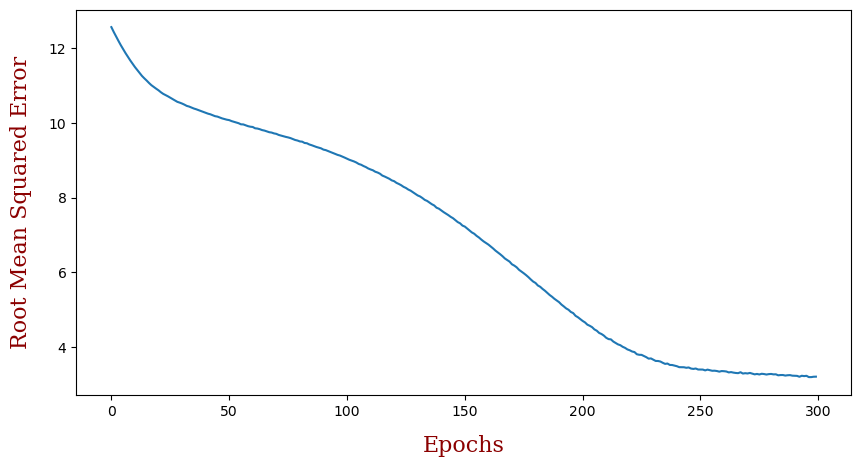

In [25]:
plt.figure(figsize = (10, 5))
plt.plot(losses)
plt.xlabel("Epochs", fontdict=font, labelpad=12)
plt.ylabel("Root Mean Squared Error", fontdict=font, labelpad=12)
plt.show()

# Evaluating Model

In [26]:
with torch.no_grad():
    model =  model.eval()
    y_val = model(cat_test, con_test)
    loss = torch.sqrt(criterion(y_val, y_test))

In [30]:
table = pd.DataFrame(torch.cat([y_test, y_val], axis = 1).numpy(), columns = ["Actual", "Predicted"])
table["Diff"] = table["Actual"] - table["Predicted"]
table[:20].style.format(precision=2)

,Actual,Predicted,Diff
0,8.10,8.64,-0.54
1,12.10,13.22,-1.12
2,4.90,5.51,-0.61
3,15.30,17.96,-2.66
4,11.30,12.21,-0.91
5,16.50,20.24,-3.74
6,3.30,3.95,-0.65
7,4.50,5.37,-0.87
8,5.70,5.05,0.65
9,20.10,22.68,-2.58


# Saving Model

In [31]:
model.train()
torch.save(model, f="./saved_models/taxi_fare_prediction_model.pkl")